<a href="https://colab.research.google.com/github/BharatSingla12/Play_Store_App_Review_Analysis_EDA/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  <font size="+3" color='#cc0707'><b>  <u> Play Store App Review Analysis </u></b>
<font size="+1" color='#144c5c'><b>  The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. Here I explored and analyzed the data to discover key factors responsible for app engagement and success. 

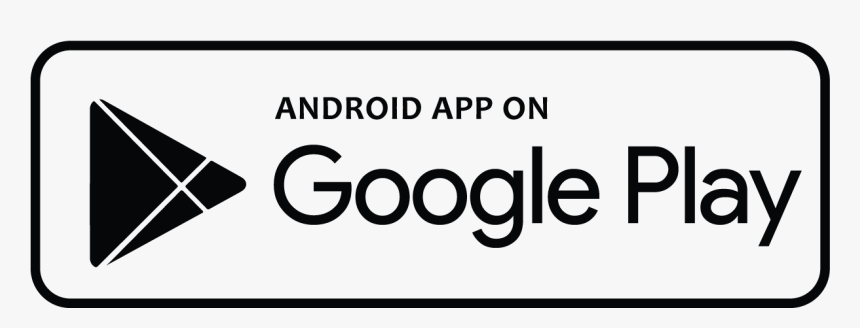

 <a href="https://onedrive.live.com/view.aspx?resid=C387FF99405739E7!3768&ithint=file%2cpptx&authkey=!AP6skmT41Vd4yOA" target="_blank"> <font size="+2" color='#cc0707'><b> Click here to watch the Persentation of Analsis  </b> </a>    📊 

## <font size="+2" color='#144c5c'><b> Data Description

### **<u>Play Store Data Description</u>**
1. **App**: It contains the app name.
2. **Category**: It assigns the app a category.
3. **Rating**: It contains the average rating given to the app by its users.
4. **Reviews**: It displays the number of people who have left a review for the relevant app.
5. **Size**: It contains the amount of disc space necessary to install the relevant app.
6. **Installs**: It displays the number of times the app was downloaded.
7. **Type**: It specifies if an app is free or paid.
8. **Price**: It gives the price of the app required to install the app. 
9. **Content rating**: It specifies whether or not an app is appropriate for all age groups.
10. **Genres**: It specifies the genre(s) to which the app belongs.
11. **Last updated**: It indicates when the most recent update was released.
12. **Current Ver**: It displays the current version of the app.
13. **Android Ver**: It provides the Android version of the corresponding app.

### **<u>User Reviews Data Description</u>**
1. **App:** It contains the name of the app with a short description (optional).
2. **Translated_Review:** It contains the English translation of the review dropped by the user of the app.
3. **Sentiment:** It gives the attitude/emotion of the writer. It can be ‘Positive’, ‘Negative’, or ‘Neutral’.
4. **Sentiment_Polarity:** It gives the polarity of the review. Its range is [-1,1], where 1 means ‘Positive statement’ and -1 means a ‘Negative statement’.
5. **Sentiment_Subjectivity:** This value gives how close a reviewer’s opinion is to the opinion of the general public. Its range is [0,1]. Higher the subjectivity, closer is the reviewer’s opinion to the opinion of the general public, and lower subjectivity indicates the review is more of a factual information.

## <font size="+2" color='#144c5c'><b> Importing the all the important Libraies

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

# Pandas visual setting
pd.set_option('display.max_columns', None)

# To ignore irrelevent warnigns 
import warnings
warnings.filterwarnings('ignore')

# Seaborn setting 
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
sns.set_style("white")

## <font size="+2" color='#144c5c'><b> Exploring and Cleaning the Playstore Data

###  <font  size="+1" color='#144c5c'> Lets take a glimpse of the overall data and each column individually </font>

In [54]:
# Load the playstore data 
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1njpjUHixh8aD7ZJhVyjaK1VtkBRaM2uf', encoding= 'unicode_escape')
# Lets view the overall data
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite â FREE Live Cool Themes, Hid...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [55]:
# Lets get the basic info of the overall data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [56]:
# list of all the columns 
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [57]:
# Lets check how many App are there 
df['App'].value_counts()

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: App, Length: 9660, dtype: int64

It shows that there are so many duplicate values as the app name is repeating.

In [58]:
# Lets check how many Category are there 
df['Category'].value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

In [59]:
# All the unique values of Genres with their frequency 
df['Genres'].value_counts()

Tools                     842
Entertainment             623
Education                 549
Medical                   463
Business                  460
                         ... 
Arcade;Pretend Play         1
Card;Brain Games            1
Lifestyle;Pretend Play      1
Comics;Creativity           1
Strategy;Creativity         1
Name: Genres, Length: 120, dtype: int64

In [60]:
# All the unique values of install with their frequency 
df['Installs'].value_counts()

1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Free                 1
Name: Installs, dtype: int64

In [61]:
# All the unique values of Type with their frequency 
df['Type'].value_counts()

Free    10039
Paid      800
0           1
Name: Type, dtype: int64

In [62]:
# All the unique values of Content Rating with their frequency 
df['Content Rating'].value_counts()

Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

In [63]:
# All the unique values of Price with their frequency 
df['Price'].value_counts()

0         10040
$0.99       148
$2.99       129
$1.99        73
$4.99        72
          ...  
$1.75         1
$14.00        1
$4.85         1
$46.99        1
$1.04         1
Name: Price, Length: 93, dtype: int64

In [64]:
# All the unique values of Android Ver with their frequency 
df['Android Ver'].value_counts()

4.1 and up            2451
4.0.3 and up          1501
4.0 and up            1375
Varies with device    1362
4.4 and up             980
2.3 and up             652
5.0 and up             601
4.2 and up             394
2.3.3 and up           281
2.2 and up             244
4.3 and up             243
3.0 and up             241
2.1 and up             134
1.6 and up             116
6.0 and up              60
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              24
1.5 and up              20
4.4W and up             12
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
2.2 - 7.1.1              1
5.0 - 7.1.1              1
Name: Android Ver, dtype: int64

### <font  size="+1" color='#144c5c'> Lets first deal with the null values and drop the redundant columns.

In [65]:
# Lets find the number of NaN values in each column
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [66]:
# All the rows in which atleast one feature is null (exculding Ratings)
None_df = df[(df.drop(['Rating'], axis = 1).isnull().sum(axis=1) >= 1)]
None_df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11k,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8.7M,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
6803,BT Master,FAMILY,NaN,0,222k,100+,Free,0,Everyone,Education,"November 6, 2016",NaN,1.6 and up
7333,Dots puzzle,FAMILY,4.0,179,14M,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up
7407,Calculate My IQ,FAMILY,NaN,44,7.2M,"10,000+",Free,0,Everyone,Entertainment,"April 3, 2017",NaN,2.3 and up
7730,UFO-CQ,TOOLS,NaN,1,237k,10+,Paid,$0.99,Everyone,Tools,"July 4, 2016",NaN,2.0 and up
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [67]:
# Drop all the rows in which atleast one feature is null (exculding Ratings)
df = df.drop(None_df.index)

In [68]:
# calculating median value
median_value = df['Rating'].median()

# replacing the missing values with median value
df['Rating'].fillna(median_value, inplace= True)

In [69]:
# Lets check the null values 
df.isnull().sum().sort_values(ascending = False)

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [70]:
# Lets drop the redundant columns 
df = df.drop(['Last Updated', 'Current Ver'], axis = 1)
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,4.0.3 and up
2,"U Launcher Lite â FREE Live Cool Themes, Hid...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,4.4 and up


In [71]:
# Lets check the number of  duplicates rows corresponding to app
df.duplicated().sum()

485

In [72]:
# dropping duplicates from the 'App' column.
df = df.drop_duplicates(subset = 'App')

In [73]:
# The final shape of the data set is
df.shape

(9648, 11)

### <font  size="+1" color='#144c5c'>  Converting the string formatted numerical data into numerical format.  

In [74]:
# Expressing the Reviews in integers form.

def reviewstonumber(row):
    # Filter out last letter 
    if row[-1].upper() == "M":
        row = int(float(row[0:-1]))*10**6
    else:   
        row = int(row)
    return row

df["Reviews"] = df["Reviews"].apply(reviewstonumber)

In [75]:
# Expressing the Installs in integers form.

def Installstonumber(row):
    try:
        returnvalue = int(row[:-1].replace(',', ''))
    except:
        try:
            returnvalue =  int(row)
        except:
            returnvalue = 0
    return returnvalue

df["Installs"] = df["Installs"].apply(Installstonumber)

In [76]:
# Expressing the Price in integers form.

def pricetonumber(row):
    try:
        returnvalue =float(row[1:].replace(',', ''))
    except:
        try:
            returnvalue =float(row)
        except:
            returnvalue = None

    return returnvalue            

df["Price"] = df["Price"].apply(pricetonumber)

In [77]:
# Expressing the size in numerical data in the units of MB.

def sizetonumber(row):
    # Filter out last letter 
    # Here we are replacing "Varies with size" with the mean of the app size. 
    if row[-1].upper() == "M":
        row = float(row[0:-1])
    elif row[-1].upper() == "K":
        row = float(row[0:-1])/1000
    else:
        row = None                 
    return row

df["Size"] = df["Size"].apply(sizetonumber)
# df['Size'].fillna(df['Size'].mean(), inplace=True)
df.rename(columns={"Size": "Size(MB)"}).head(5)

,App,Category,Rating,Reviews,Size(MB),Installs,Type,Price,Content Rating,Genres,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,4.0.3 and up
2,"U Launcher Lite â FREE Live Cool Themes, Hid...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,4.4 and up


### <font  size="+1" color='#144c5c'>  Creating new feature

In [78]:
df["Revenue"] = df["Price"]*df["Installs"]

## <font size="+2" color='#144c5c'><b> Finding the insights from the Playstore Data

#### <font  size="+1" color='#144c5c'> 1. Statistic analysis

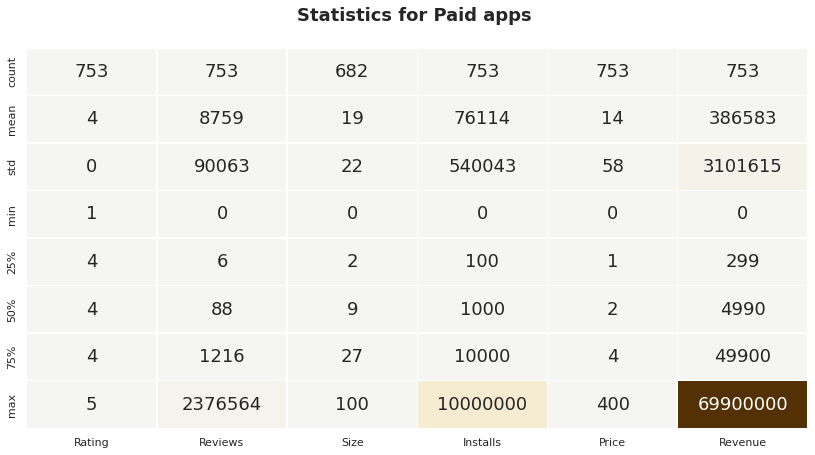

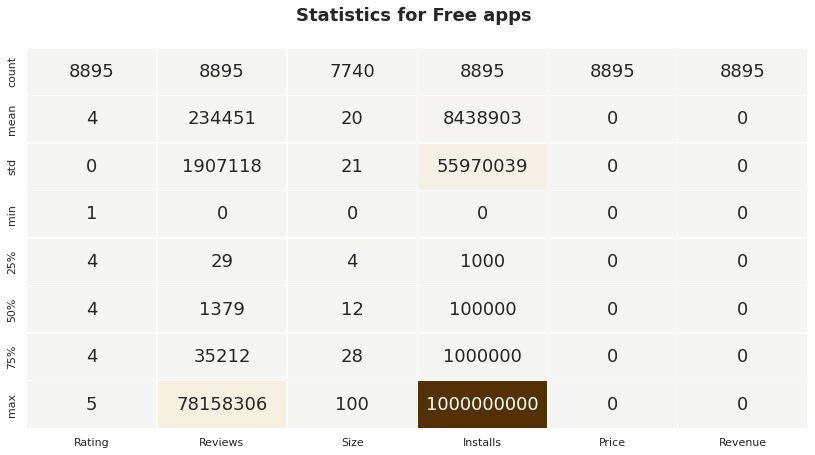

In [79]:
df1 = df[df['Type']=="Paid"].describe().astype(int) 
plt.figure(figsize=(14,7))
plt.title('Statistics for Paid apps \n', weight='bold', fontsize=18)
plot = sns.heatmap(df1, annot=True, linewidths=.5,linecolor='white',center=0, cmap="BrBG_r",annot_kws = {'size':18},cbar= False,fmt='.0f')
plt.show()

print("\n \n \n")
df1 = df[df['Type']=="Free"].describe().astype(int) 
plt.figure(figsize=(14,7))
plt.title('Statistics for Free apps \n', weight='bold', fontsize=18)
plot = sns.heatmap(df1, annot=True, linewidths=.5,linecolor='white',center=0, cmap="BrBG_r",annot_kws = {'size':18},cbar= False,fmt='.0f')
plt.show()

- For paid apps, median rating is 4, median reviews is 88, median size is 9 MB, median installs are 1000, median price is $2, median revenue is $4990. 
- For free apps, median rating is 4, median reviews is 1379 , median size is 12 MB, median installs are 100000.

#### <font  size="+1" color='#144c5c'> 2. Bar chart to understand the distribution of android version among users.

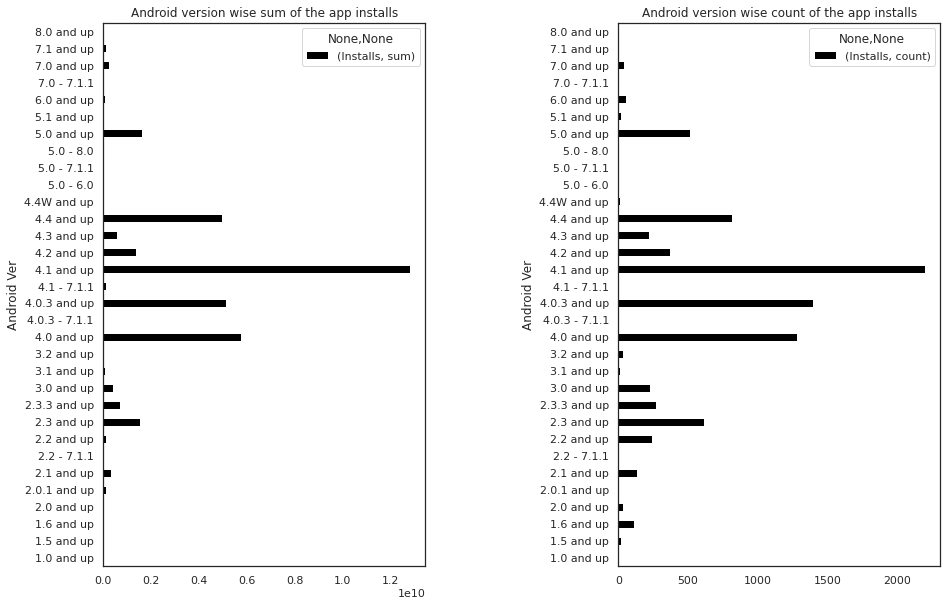

In [80]:
df0 = df[['Installs', 'Android Ver']][df['Android Ver'] != 'Varies with device']  #REmove varies with device 

df1 = df0[['Installs', 'Android Ver']]  # Select the columns
df2 = df1.groupby(by= 'Android Ver', as_index=True).agg(['sum', 'count', 'mean']).fillna(0)

fig, axs = plt.subplots(1, 2, figsize  = (15,10))
fig.subplots_adjust(hspace=0.2, wspace = 0.6)
df2.sort_index().plot(y = ('Installs', 'sum'), ax = axs[0], kind = 'barh', color= 'black', title = "Android version wise sum of the app installs")
df2.sort_index().plot(y = ('Installs', 'count'), ax = axs[1], kind = 'barh',color= 'black', title = "Android version wise count of the app installs")
plt.show()

- The most of the app available on play store supports the android version 4.x and up and also the mostly users are using the apps that is compatible till version 4.x. 

- It might possible that most android users are using device with android version 4.x. 

- Therefore, the new app should also be compatible till android version 4.x.

#### <font  size="+1" color='#144c5c'> 3. Pie plot of Install using the Type.

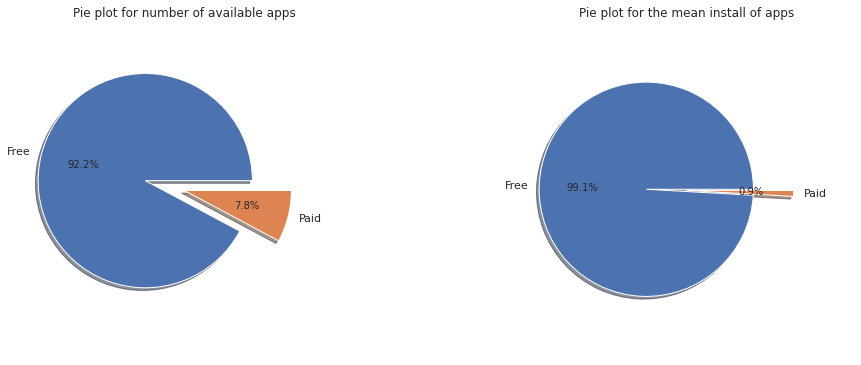

The number of of paid apps is 7.8 percent of the total avilable apps.
The average install of paid apps is 0.89 percent of the average install of all apps.


In [81]:
fig, axs = plt.subplots(1, 2, figsize  = (15,15))
# fig.suptitle('Average rating per app for each category')
fig.subplots_adjust(hspace=0, wspace = 0.5)

df1 = df[['Installs', 'Type']].groupby('Type', as_index=True).agg(['count', 'mean', 'sum'])

percentage1 = round((df1.loc['Paid',('Installs', 'count')]/(df1.loc['Paid',('Installs', 'count')]+df1.loc['Free',('Installs', 'count')]))*100, 2)
percentage2 = round((df1.loc['Paid',('Installs', 'mean')]/(df1.loc['Paid',('Installs', 'mean')]+df1.loc['Free',('Installs', 'mean')]))*100, 2)

df1.sort_values(by=('Installs', 'count'), ascending=False).plot(y =('Installs', 'count'), kind='pie', ax = axs[0],ylabel="", title = "Pie plot for number of available apps", autopct='%1.1f%%', startangle=360,explode= (0.3, 0),radius =0.8, shadow=True, legend = False)
df1.sort_values(by=('Installs', 'mean'), ascending=False).plot(y =('Installs', 'mean'), kind='pie', ax = axs[1],ylabel="", title = "Pie plot for the mean install of apps", autopct='%1.1f%%', startangle=360,explode= (0.3, 0),radius =0.8, shadow=True, legend = False)
plt.show()

print(f'The number of of paid apps is {percentage1} percent of the total avilable apps.')
print(f'The average install of paid apps is {percentage2} percent of the average install of all apps.')


- The number of paid apps is 7.8 percent of the total available apps. 
- The average install of paid apps is 0.9 percent of the average install of all apps.
- Since the percentage of available free apps is lesser than the percentage of average install of free apps therefore the free apps are in more demand as compared to paid apps.

#### <font  size="+1" color='#144c5c'> 4. Bar plot of Install using the category.

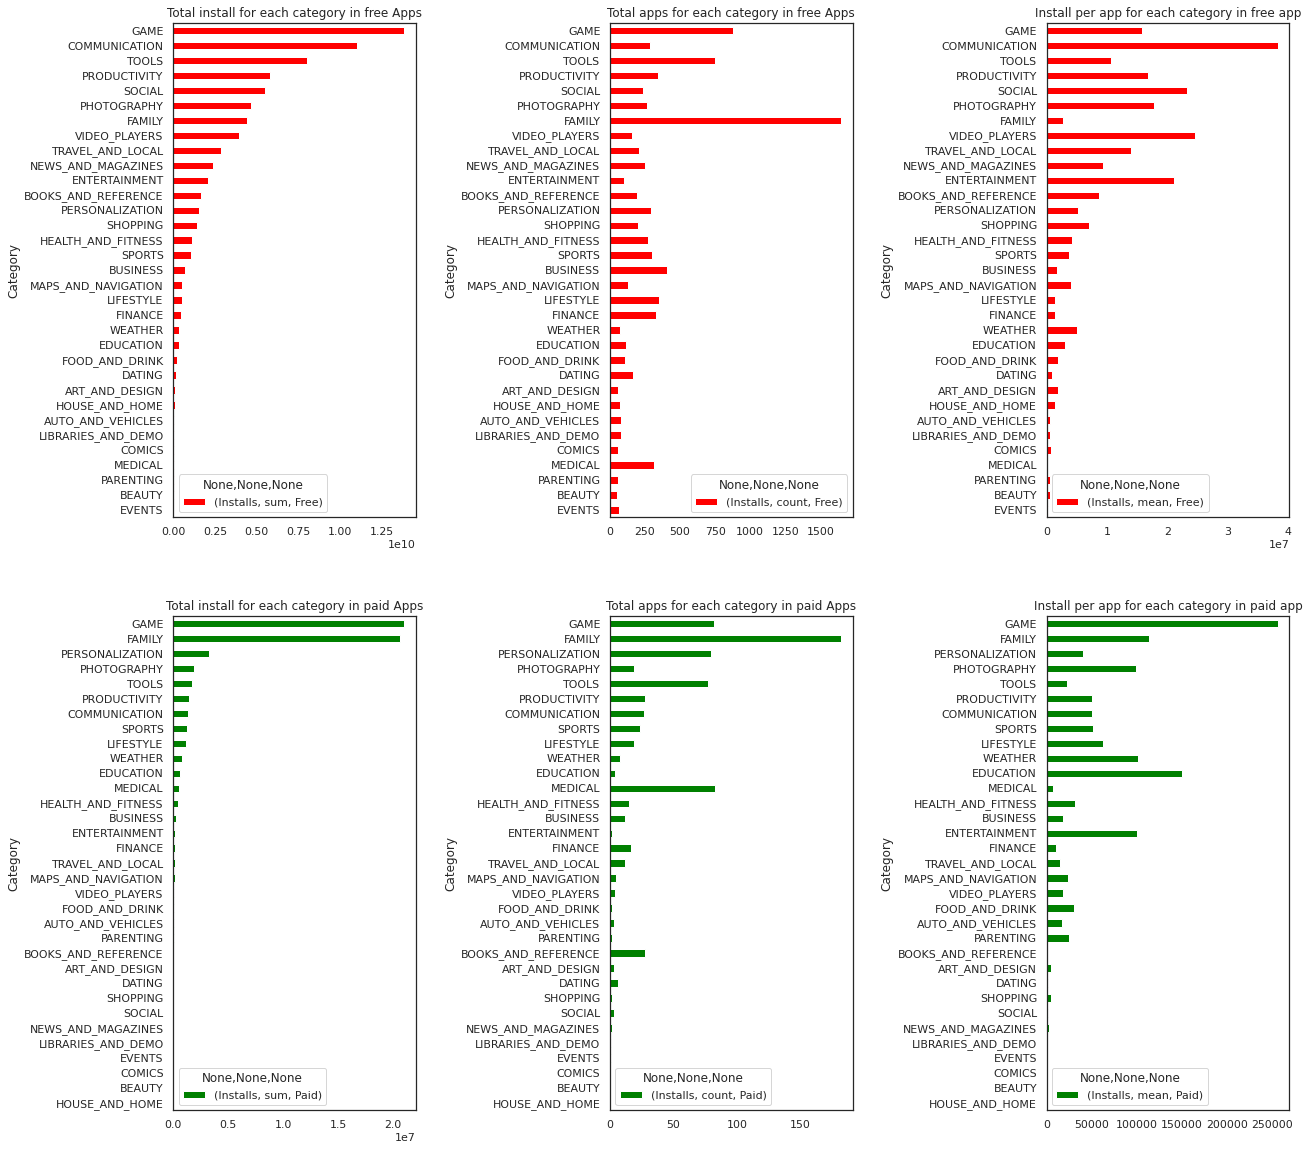

In [82]:
# Create the dataframe
df1 = df[['Installs', 'Rating', 'Category', 'Type']]  # Select the columns
df2 = df1.groupby(by= ['Type', 'Category'], as_index=True).agg(['sum', 'count', 'mean']).unstack(level=0).fillna(0)

# Plot
fig, axs = plt.subplots(2, 3, figsize  = (20,20))
# fig.suptitle('Demand and Supply of Category Class')
fig.subplots_adjust(hspace=0.2, wspace = 0.8)

df2.sort_values(by=('Installs', 'sum', 'Free'), ascending=True).plot(y = ('Installs', 'sum', 'Free'), ax = axs[0, 0], kind = 'barh', color= 'red', title = "Total install for each category in free Apps")
df2.sort_values(by=('Installs', 'sum', 'Free'), ascending=True).plot(y = ('Installs', 'count', 'Free'), ax = axs[0, 1], kind = 'barh',color= 'red', title = "Total apps for each category in free Apps")
df2.sort_values(by=('Installs', 'sum', 'Free'), ascending=True).plot(y = ('Installs', 'mean', 'Free'), ax = axs[0, 2], kind = 'barh',color= 'red', title = "Install per app for each category in free app")

df2.sort_values(by=('Installs', 'sum', 'Paid'), ascending=True).plot(y = ('Installs', 'sum', 'Paid'), ax = axs[1, 0], kind = 'barh', color= 'green', title = "Total install for each category in paid Apps")
df2.sort_values(by=('Installs', 'sum', 'Paid'), ascending=True).plot(y = ('Installs', 'count', 'Paid'), ax = axs[1, 1], kind = 'barh',color= 'green', title = "Total apps for each category in paid Apps")
df2.sort_values(by=('Installs', 'sum', 'Paid'), ascending=True).plot(y = ('Installs', 'mean', 'Paid'), ax = axs[1, 2], kind = 'barh',color= 'green', title = "Install per app for each category in paid app")
plt.show()

- From first bar plot, the top 6 free apps category that has maximum number of total installs are: Game, Communication, Tool, Productivity, Social, Photography. But from second bar plot, among above top 6 free apps category, the number of available apps for Communication, Productivity, Photography and Social is relatively low. Hence the demand of these apps is high as total install by user is high but available apps for user is less.

-  The third bar plot shows that the mean install per app. Here greater the average install per app means that the demand for that category is high.


- From first bar plot, the top 6 paid apps category that has maximum number of total installs are: Game, Family, Personalization, Photography, Tools, Productivity. But from second bar plot, among above top 6 paid apps category, the number of available apps for Game, Personalization, Photography, Tools, and Productivity is relatively low. Hence the demand of these apps is high as total install by user is high but available apps for user is less.

- The third bar plot shows that the mean install per app. Here greater the average install per app means that the demand for that category is high.

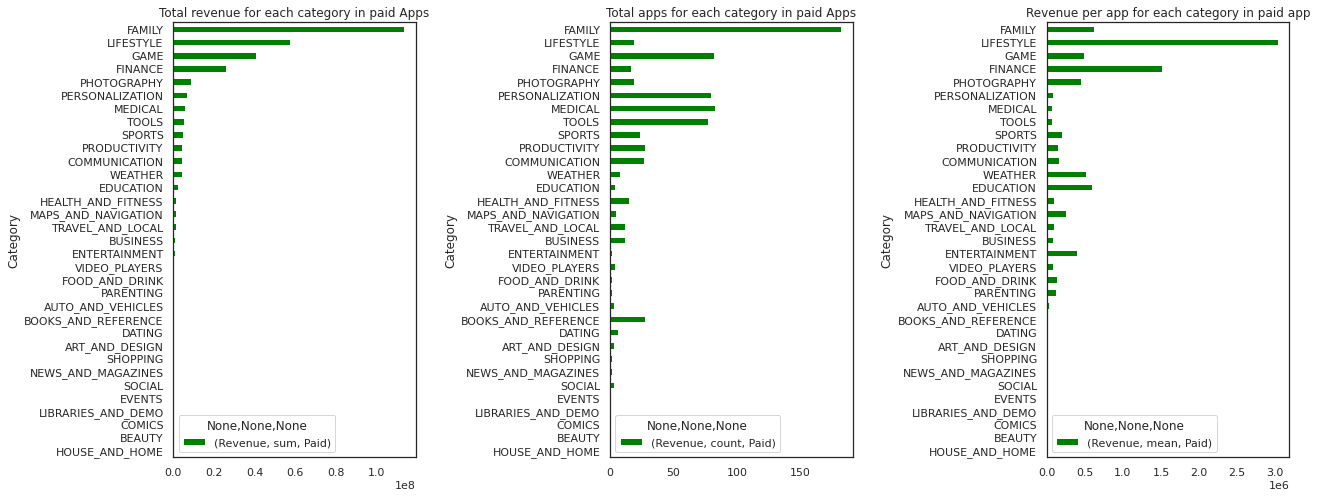

In [83]:
# Create the dataframe
df1 = df[['Installs', 'Rating', 'Category', 'Type', 'Revenue']]  # Select the columns
df2 = df1.groupby(by= ['Type', 'Category'], as_index=True).agg(['sum', 'count', 'mean']).unstack(level=0).fillna(0)

# Plot
fig, axs = plt.subplots(1, 3, figsize  = (20,8))
# fig.suptitle('Demand and Supply of Category Class')
fig.subplots_adjust(hspace=0.2, wspace = 0.8)
df2.sort_values(by=('Revenue', 'sum', 'Paid'), ascending=True).plot(y = ('Revenue', 'sum', 'Paid'), ax = axs[0], kind = 'barh', color= 'green', title = "Total revenue for each category in paid Apps")
df2.sort_values(by=('Revenue', 'sum', 'Paid'), ascending=True).plot(y = ('Revenue', 'count', 'Paid'), ax = axs[1], kind = 'barh',color= 'green', title = "Total apps for each category in paid Apps")
df2.sort_values(by=('Revenue', 'sum', 'Paid'), ascending=True).plot(y = ('Revenue', 'mean', 'Paid'), ax = axs[2], kind = 'barh',color= 'green', title = "Revenue per app for each category in paid app")
plt.show()

- From first bar plot, the top 6 paid apps category that has maximum number of total installs are: Game, Family, Personalization, Photography, Tools, Productivity. But from second bar plot, among above top 6 paid apps category, the number of available apps for Game, Personalization, Photography, Tools, and Productivity is relatively low. Hence the demand of these apps is high as total install by user is high but available apps for user is less.

- The third bar plot shows that the mean install per app. Here greater the average install per app means that the demand for that category is high.

#### <font  size="+1" color='#144c5c'> 5. Bar plot of Install using the content rating.

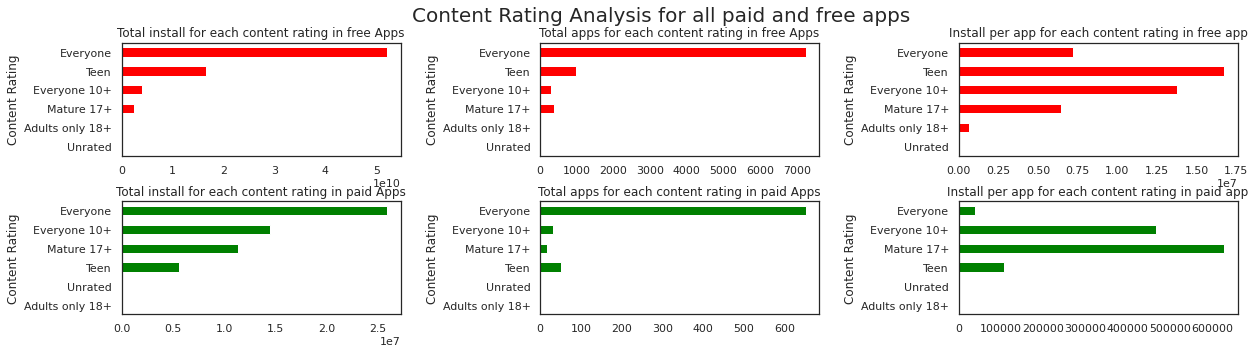

In [84]:
# Create the dataframe
df1 = df[['Installs', 'Content Rating', 'Type']]  # Select the columns
df2 = df1.groupby(by= ['Type', 'Content Rating'], as_index=True).agg(['sum', 'count', 'mean']).unstack(level=0).fillna(0)

# Plot it 
fig, axs = plt.subplots(2, 3)
fig.suptitle('Content Rating Analysis for all paid and free apps', fontsize=20)
fig.subplots_adjust(hspace=0.4, wspace = 0.5)

df2.sort_values(by=('Installs', 'sum', 'Free'), ascending=True).plot(y = ('Installs', 'sum', 'Free'), ax = axs[0, 0], kind = 'barh', figsize  = (20,5),color= 'red', title = "Total install for each content rating in free Apps", legend = False)
df2.sort_values(by=('Installs', 'sum', 'Free'), ascending=True).plot(y = ('Installs', 'count', 'Free'), ax = axs[0, 1], kind = 'barh', figsize  = (20,5),color= 'red', title = "Total apps for each content rating in free Apps", legend = False)
df2.sort_values(by=('Installs', 'sum', 'Free'), ascending=True).plot(y = ('Installs', 'mean', 'Free'), ax = axs[0, 2], kind = 'barh', figsize  = (20,5),color= 'red', title = "Install per app for each content rating in free app", legend = False)

df2.sort_values(by=('Installs', 'sum', 'Paid'), ascending=True).plot(y = ('Installs', 'sum', 'Paid'), ax = axs[1, 0], kind = 'barh', figsize  = (20,5),color= 'green', title = "Total install for each content rating in paid Apps", legend = False)
df2.sort_values(by=('Installs', 'sum', 'Paid'), ascending=True).plot(y = ('Installs', 'count', 'Paid'), ax = axs[1, 1], kind = 'barh', figsize  = (20,5),color= 'green', title = "Total apps for each content rating in paid Apps", legend = False)
df2.sort_values(by=('Installs', 'sum', 'Paid'), ascending=True).plot(y = ('Installs', 'mean', 'Paid'), ax = axs[1, 2], kind = 'barh', figsize  = (20,5),color= 'green', title = "Install per app for each content rating in paid app", legend = False)

plt.show()

- Top 5 total revenue making genres are Arcade; Action & adventure, Lifestyle, Action, Finance, Entertainment 
- Top 5 genres with maximum number of available apps are Role Playing, Action, Finance, Lifestyle, Entertainment 
- Top 5 per mean revenue making genres are Arcade; Action & adventure, Lifestyle, Finance, Action, card; Action & adventure

#### <font  size="+1" color='#144c5c'> 6. Box plot of Rating, Reviews, Size, Installs, and Price

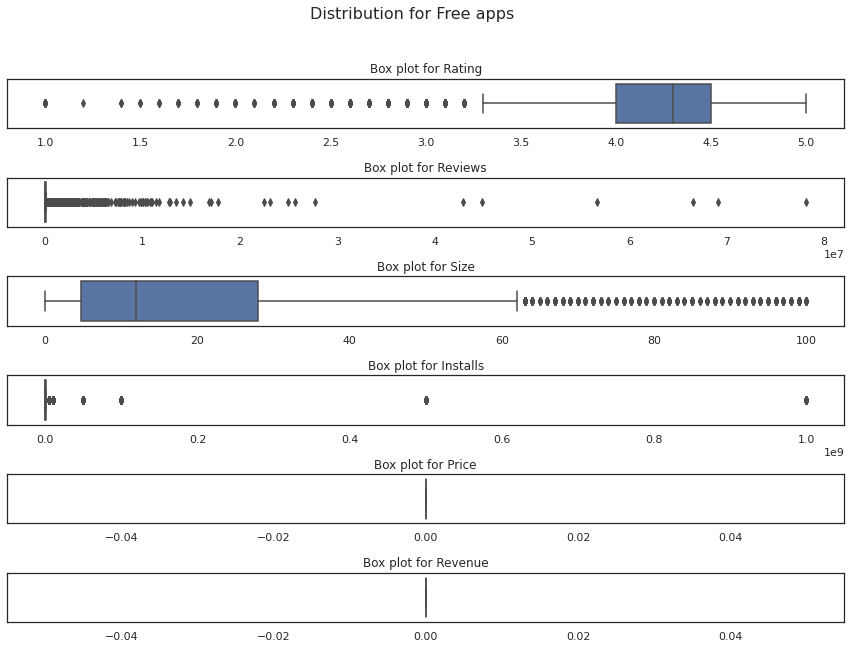

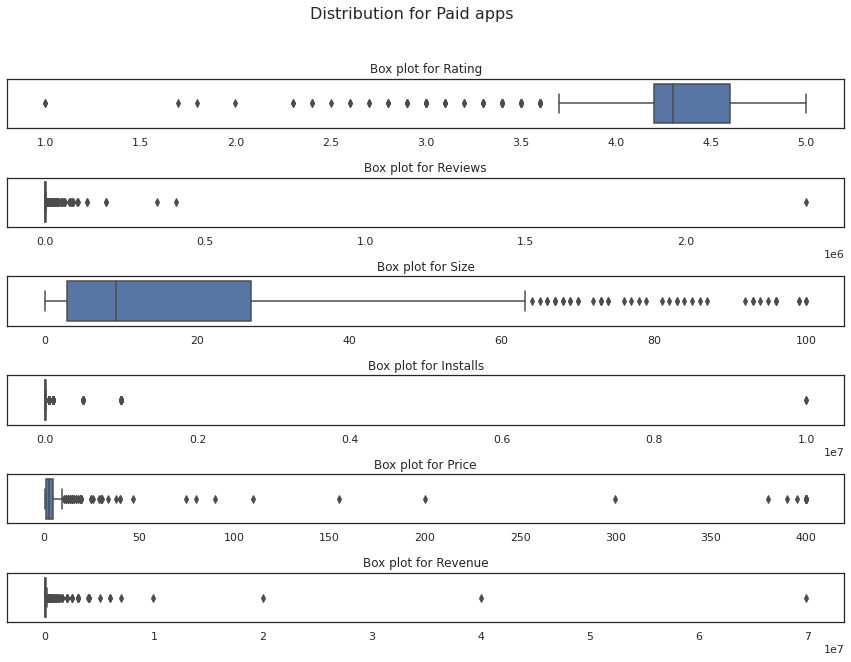

In [85]:
def Distribution(Dataframe = df, Type = 'Free'):
    df = Dataframe[Dataframe['Type']==Type]
    col = ["Rating", "Reviews", "Size", "Installs", "Price", "Revenue"]
    sns.set_theme(style="white")
    fig, ax = plt.subplots(6, 1, sharey=True, figsize=(15,10))
    fig.subplots_adjust(hspace=1, wspace = 0.6)

    for count, i in enumerate(col):
        sns.boxplot(x=i, hue="Type", data=df, ax = ax[count])
        ax[count].set_xlabel("")

        ax[count].set_title(f'Box plot for {i}')

    fig.suptitle(f'Distribution for {Type} apps', fontsize=16)
    plt.show()
    

# Box plot of free apps
Distribution(df, 'Free')
print("\n \n \n")
# Box plot of paid apps
Distribution(df, 'Paid')

- Rating is left skewed for both free and paid apps, therefore there are only few apps for which the rating is very less.
- Review is right skewed for both free and paid apps, therefore there are only few apps for which the review is very high.
- Size is right skewed for both free and paid apps, therefore there are only few apps for which the size is very high.
- Installs is right skewed for both free and paid apps, therefore there are only few apps for which the install is very high.
- For paid apps the price and revenue is also right skewed, therefore there are only few paid apps for which the price and revenue is very high.

#### <font  size="+1" color='#144c5c'> 7. Distribution plot of Rating, Reviews, Size, Installs, Price

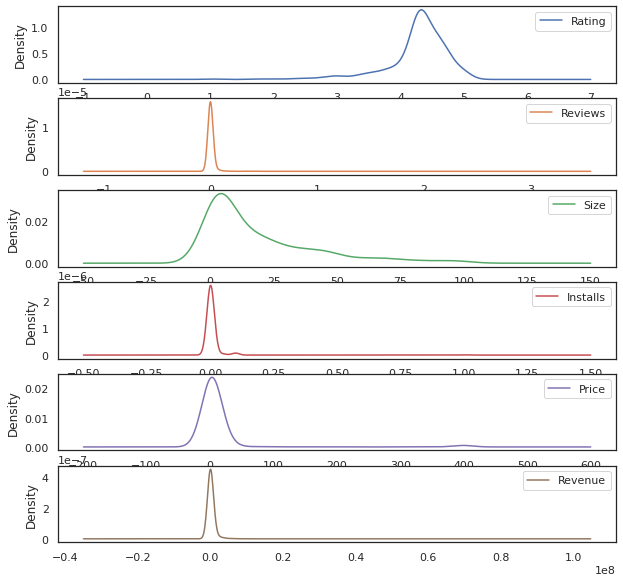

In [86]:
df1 = df[df['Type']=='Paid']
df1.plot(kind = 'density', figsize  = (10,20),subplots = True, layout  = (12,1),sharex = False)
plt.show()


#### <font  size="+1" color='#144c5c'> 8. Correlation heatmap of Rating, Reviews, Size, Installs, and Price.

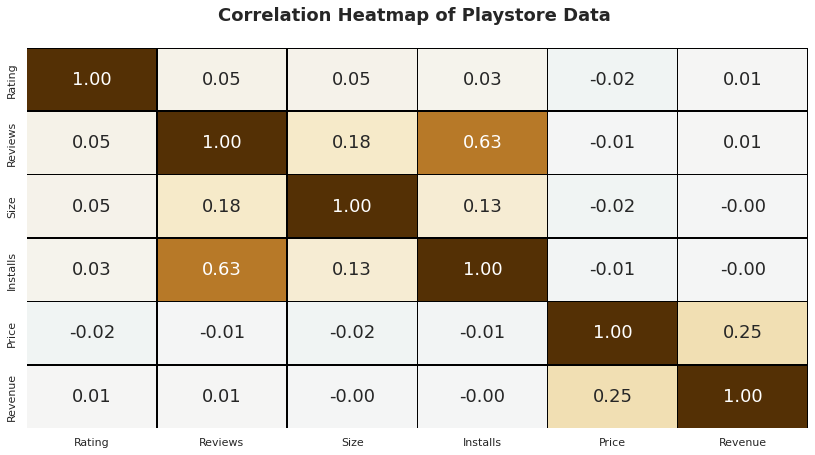

In [87]:
plt.figure(figsize=(14,7))
plt.title('Correlation Heatmap of Playstore Data \n', weight='bold', fontsize=18)
plot = sns.heatmap(df.corr(), annot=True, linewidths=.5,linecolor='black',center=0,  vmin = -1, cmap="BrBG_r",annot_kws = {'size':18},cbar= False,fmt='.2f')
plt.show()

- The Reviews and Installs columns have a strong positive correlation. This shows that higher the install the higher will be the reviews.
- Price is slightly inversely connected to Rating, Reviews, and Installs. This means that as the app's price rises, the average rating, total number of reviews, and Installs decrease significantly.
- The Rating column has a minor positive correlation with the Installs and Reviews columns. This suggests that as the average user rating rises, so will the number of app installs and reviews.

#### <font  size="+1" color='#144c5c'> 9. Average rating per app for each category and for each genra

[]

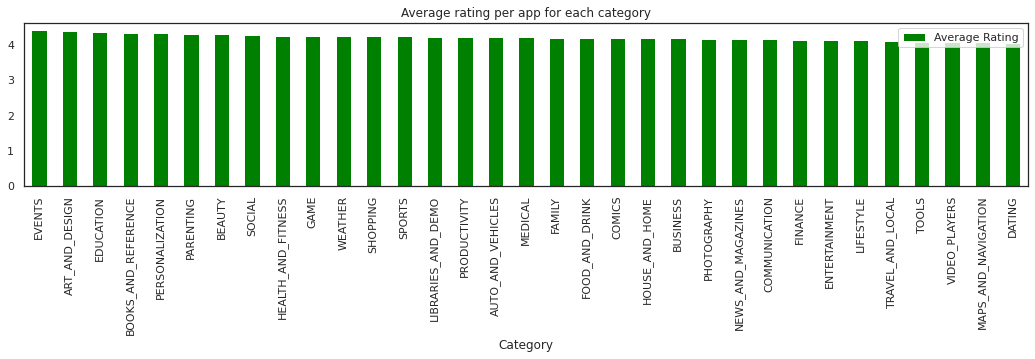

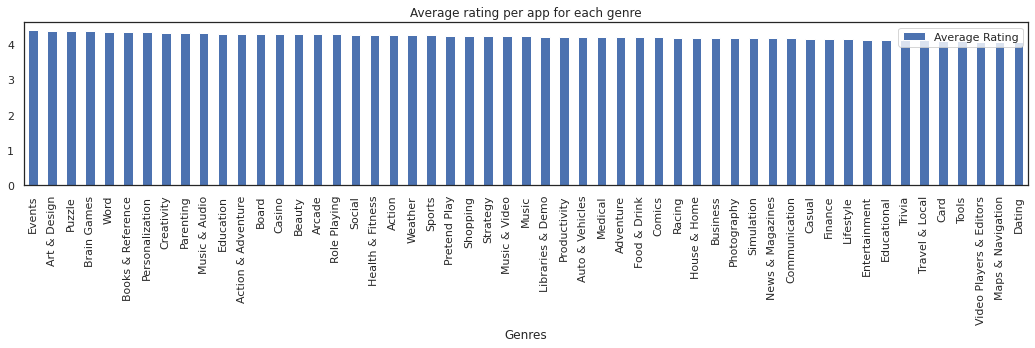

In [88]:
# Calculate the average rating per category
df1 = df[[ 'Rating', 'Category', 'Type']]  # Select the columns
df2 = df1.groupby(by= ['Category'], as_index=True).agg(['mean', 'count']).fillna(0)
ax = df2.sort_values(by=('Rating', 'mean'), ascending=False).plot(y = [('Rating', 'mean')], kind = 'bar',figsize  = (18,3), title = 'Average rating per app for each category', color = "green")
ax.legend(["Average Rating"])
plt.plot()

# Calculate the average rating per genra
df1 = df.copy()
df1["Genres"] = df["Genres"].apply(lambda x : x.split(";"))
df2 = df1.explode('Genres')
df3 = df2[[ 'Rating', 'Genres', 'Type']]  # Select the columns
df4 = df3.groupby(by= ['Genres'], as_index=True).agg(['sum', 'count', 'mean']).fillna(0)

ax = df4.sort_values(by=('Rating', 'mean'), ascending=False).plot(y = [('Rating', 'mean')], kind = 'bar',figsize  = (18,3), title = 'Average rating per app for each genre')
ax.legend(["Average Rating"])
plt.plot()


#### <font  size="+1" color='#144c5c'> 10. Average reviews per app for each category

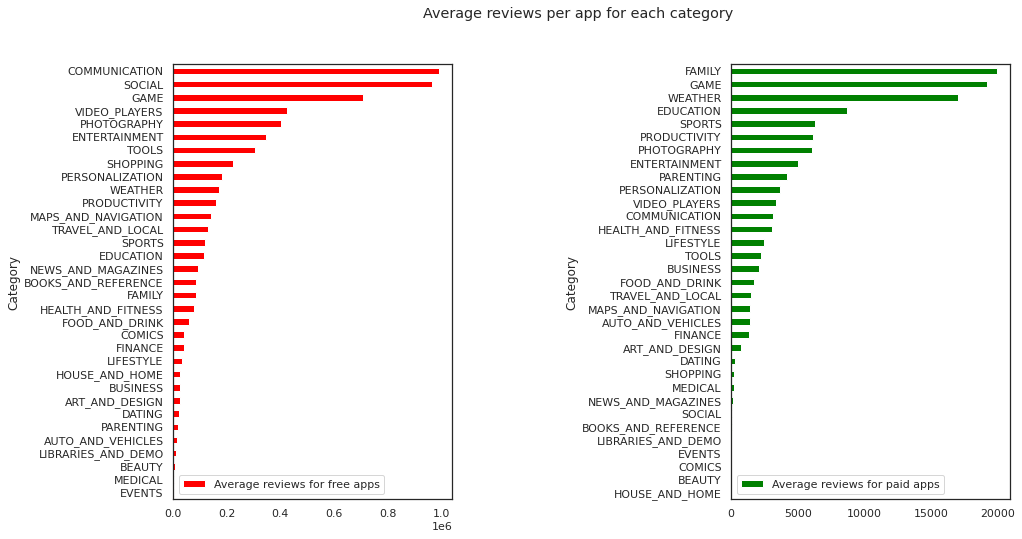

In [89]:
df1 = df[['Installs', 'Reviews', 'Category', 'Type']]  # Select the columns
df2 = df1.groupby(by= ['Type', 'Category'], as_index=True).agg(['mean', 'count']).unstack(level=0).fillna(0)

fig, axs = plt.subplots(1, 2, figsize  = (15,8))
fig.suptitle('Average reviews per app for each category')
fig.subplots_adjust(hspace=0.2, wspace = 1)

df2.sort_values(by=('Reviews', 'mean', 'Free'), ascending=True).plot(y = ('Reviews', 'mean', 'Free'), ax = axs[0], kind = 'barh',color= 'red')
# df2.sort_values(by=('Rating', 'mean', 'Free'), ascending=True).plot(y = ('Rating', 'count', 'Free'), ax = axs[0, 1], kind = 'barh',color= 'red')

df2.sort_values(by=('Reviews', 'mean', 'Paid'), ascending=True).plot(y = ('Reviews', 'mean', 'Paid'), ax = axs[1], kind = 'barh',color= 'green')
# df2.sort_values(by=('Rating', 'mean', 'Paid'), ascending=True).plot(y = ('Rating', 'count', 'Paid'), ax = axs[1, 1], kind = 'barh',color= 'green')


axs[0].legend(["Average reviews for free apps"])
axs[1].legend(["Average reviews for paid apps"])

plt.show()

In free apps, the highest reviews are in the following categories.
1. Communication
2. Social
3. Game
4. Video players
5. Photography

In paid apps, the highest reviews are in the following categories.
1. Family
2. Game
3. Weather
4. Education
5. Sports

#### <font  size="+1" color='#144c5c'> 11. Bar plot of Install using the Genra.

In [90]:
# Lets check how many genreas are there 

List_of_Genres = []
for i in df['Genres'].unique():
    if ";" not in i:
        List_of_Genres.append(i)
    if ";" in i:
        List_of_Genres + i.split(";")
set_of_Genres = set(List_of_Genres)

print(f"There are a total of {len(set_of_Genres)} unique generas.")

There are a total of 47 unique generas.


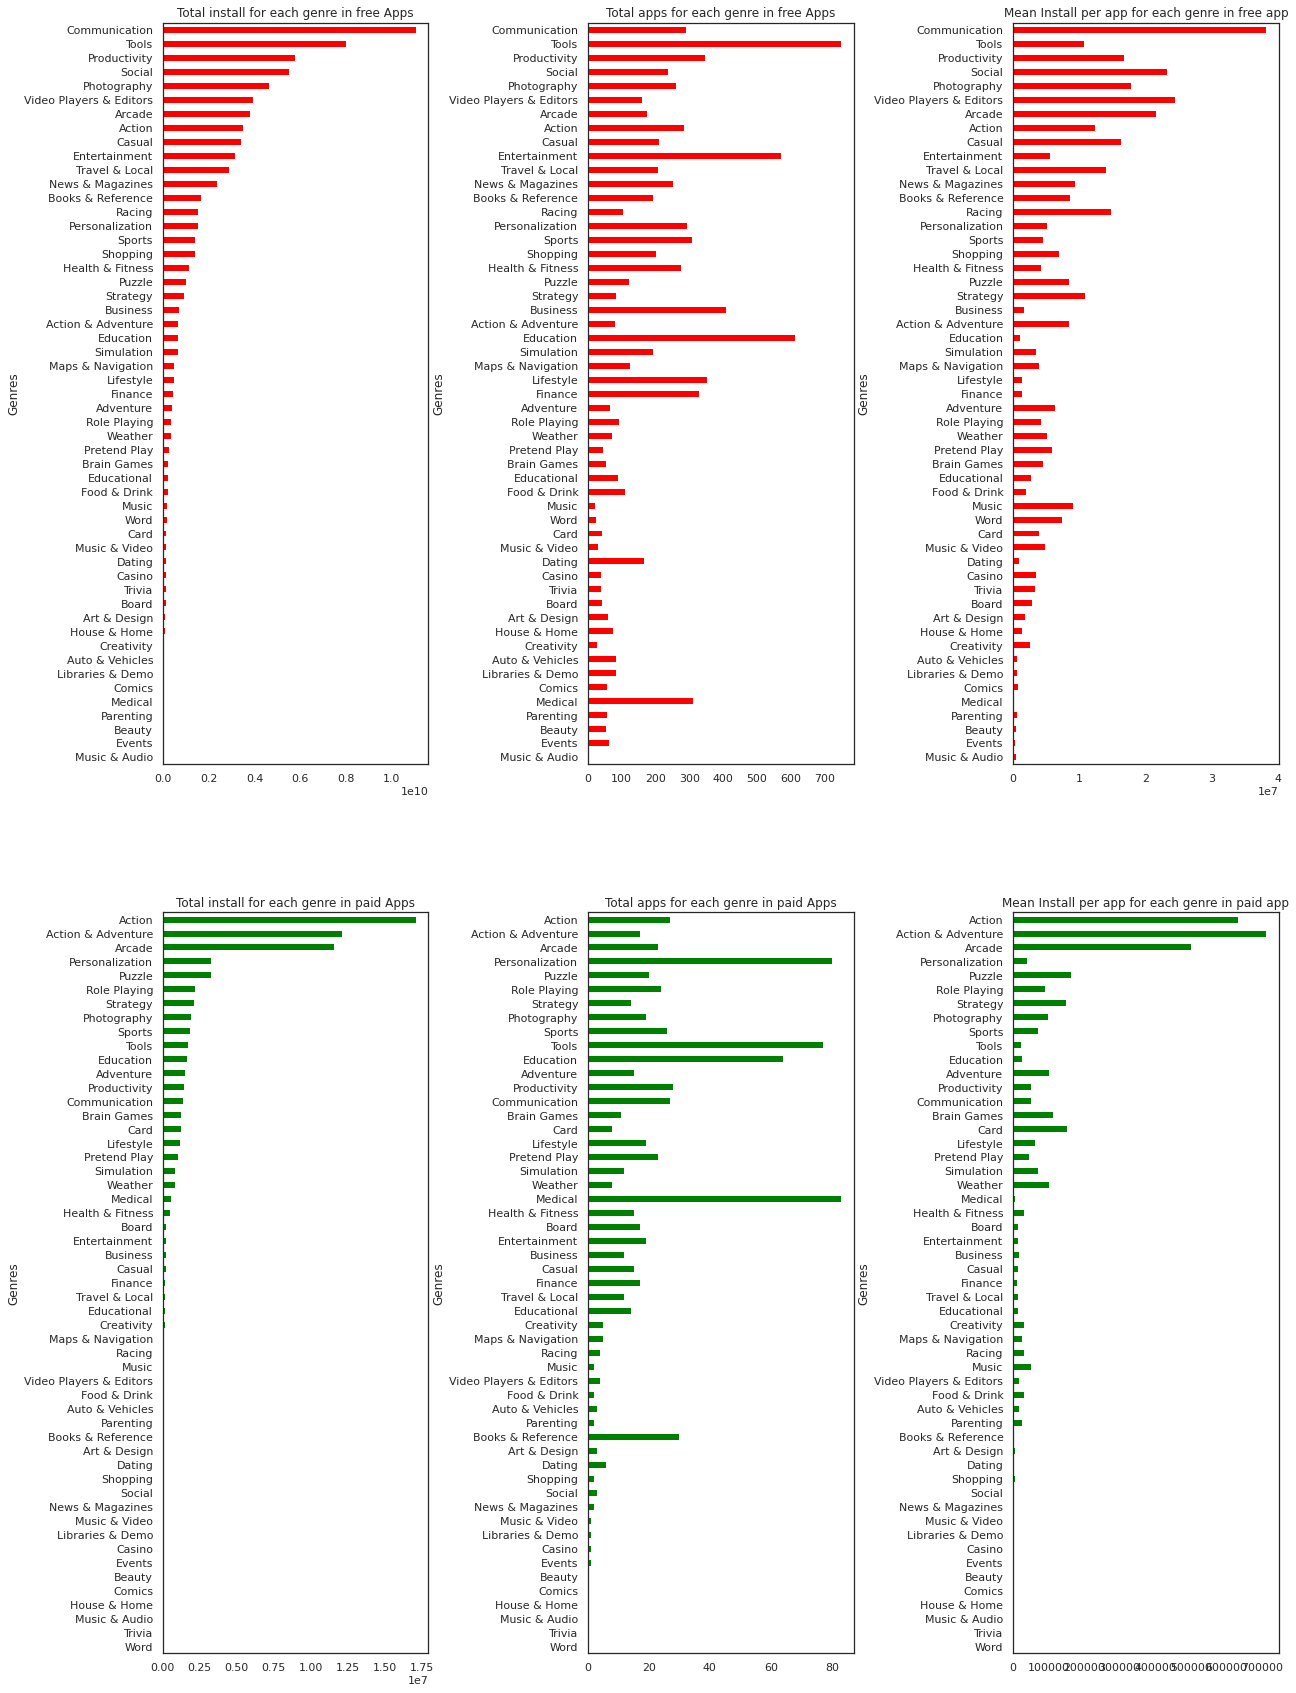

In [91]:
df1 = df.copy()
df1["Genres"] = df["Genres"].apply(lambda x : x.split(";"))
df2 = df1.explode('Genres')
df3 = df2[['Installs', 'Rating', 'Genres', 'Type']]  # Select the columns
df4 = df3.groupby(by= ['Type', 'Genres'], as_index=True).agg(['sum', 'count', 'mean']).unstack(level=0).fillna(0)

fig, axs = plt.subplots(2, 3, figsize  = (20,30))
# fig.suptitle('Demand and Supply of Genres')
fig.subplots_adjust(hspace=0.2, wspace = 0.6)

df4.sort_values(by=('Installs', 'sum', 'Free'), ascending=True).plot(y = ('Installs', 'sum', 'Free'), ax = axs[0, 0], kind = 'barh', color= 'red', title = "Total install for each genre in free Apps", legend = None)
df4.sort_values(by=('Installs', 'sum', 'Free'), ascending=True).plot(y = ('Installs', 'count', 'Free'), ax = axs[0, 1], kind = 'barh',color= 'red', title = "Total apps for each genre in free Apps", legend = None)
df4.sort_values(by=('Installs', 'sum', 'Free'), ascending=True).plot(y = ('Installs', 'mean', 'Free'), ax = axs[0, 2], kind = 'barh',color= 'red', title = "Mean Install per app for each genre in free app", legend = None)


df4.sort_values(by=('Installs', 'sum', 'Paid'), ascending=True).plot(y = ('Installs', 'sum', 'Paid'), ax = axs[1, 0], kind = 'barh', color= 'green', title = "Total install for each genre in paid Apps", legend = None)
df4.sort_values(by=('Installs', 'sum', 'Paid'), ascending=True).plot(y = ('Installs', 'count', 'Paid'), ax = axs[1, 1], kind = 'barh',color= 'green', title = "Total apps for each genre in paid Apps", legend = None)
df4.sort_values(by=('Installs', 'sum', 'Paid'), ascending=True).plot(y = ('Installs', 'mean', 'Paid'), ax = axs[1, 2], kind = 'barh',color= 'green', title = "Mean Install per app for each genre in paid app", legend = None)


plt.show()

- The first plot gives the total install of all apps of that particular genre. The second plot gives the total apps available in that genre. The third gives the average app install in that genre. 

- If the total installs are high but apps are less then it means that genre is in demand. Also, greater the average install per app tells that the apps for that genre is in demand.

- The first plot gives the total install of all apps of that particular genre. The second plot gives the total apps available in that genre. The third gives the average app install in that genre. 

- If the total installs are high but apps are less then it means that genre is in demand. Also, greater the average install per app tells that the apps for that genre is in demand.

#### <font  size="+1" color='#144c5c'> 12. Average price in each category 

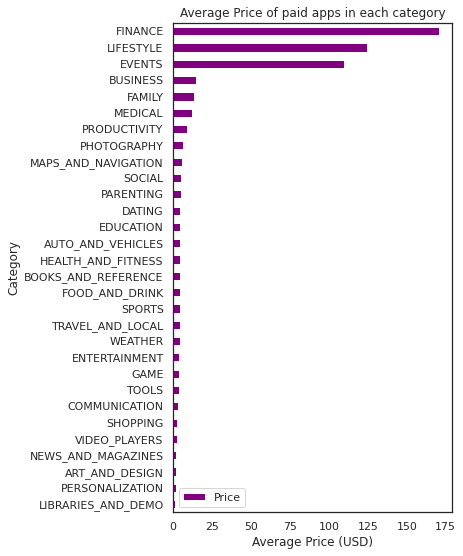

In [92]:
# Average price paid in each category

df[df['Type'] == 'Paid'].groupby('Category')['Price'].mean().sort_values(ascending=False).plot.barh(figsize = (5,9), color='purple').invert_yaxis()
plt.xlabel('Average Price (USD)')
plt.title('Average Price of paid apps in each category')
plt.legend()
plt.show()

For the paid apps the top 5 highest average price categories are:
- Finance
- Lifestyle
- Events
- Business
- Family

#### <font  size="+1" color='#144c5c'> 13. Rating Bar Chart Analysis

[]

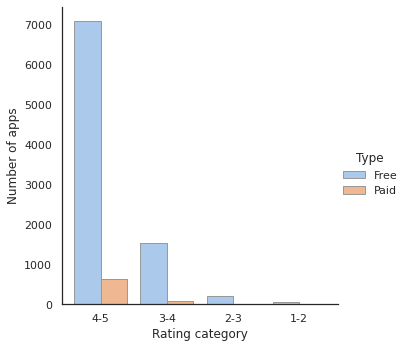

In [93]:
# Convert numerical rating values to categorical values.

def group_rating(x):
  '''
  Convert numerical rating values to categorical values.
  '''
  if x>=4:
    return '4-5'
  elif x>=3 and x<4:
    return '3-4'
  elif x>=2 and x<3:
    return '2-3'
  elif x>=1 and x<2:
    return '1-2'
  else:
    return '0-1'

df['Rating category'] = df['Rating'].apply(lambda x: group_rating(x))


# Plot the graph
sns.catplot(x="Rating category", hue="Type", kind="count",
            palette="pastel", edgecolor=".6",
            data=df)
plt.ylabel('Number of apps')

plt.plot()

#### <font  size="+1" color='#144c5c'> 14. Pair plot of Rating, Reviews, Size, Installs, and Price.

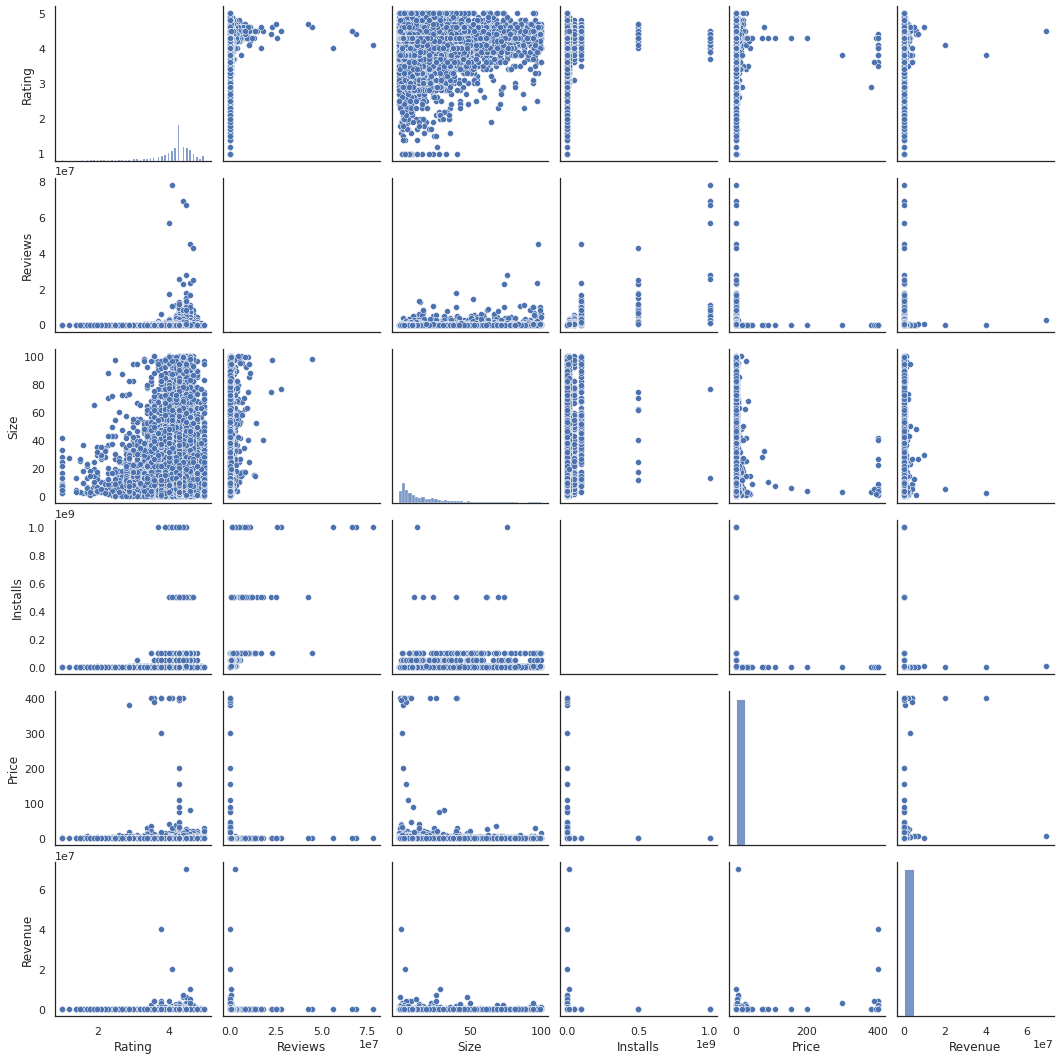

In [94]:
# Plot the pair plot
sns.pairplot(df)
plt.show()

#### <font  size="+1" color='#144c5c'> 14. Top 100 highest revenue making apps analysis

In [95]:
df1 = df
df2 = df1[['App', 'Price', 'Installs', "Content Rating", 'Genres', 'Category' ,'Revenue']].sort_values(by=['Revenue'], ascending = False).set_index('App').head(100)
df2

,Price,Installs,Content Rating,Genres,Category,Revenue
App,,,,,,
Minecraft,6.99,10000000,Everyone 10+,Arcade;Action & Adventure,FAMILY,69900000.0
I am rich,399.99,100000,Everyone,Lifestyle,LIFESTYLE,39999000.0
I Am Rich Premium,399.99,50000,Everyone,Finance,FINANCE,19999500.0
Hitman Sniper,0.99,10000000,Mature 17+,Action,GAME,9900000.0
Grand Theft Auto: San Andreas,6.99,1000000,Mature 17+,Action,GAME,6990000.0
...,...,...,...,...,...,...
BSPlayer,5.99,50000,Everyone,Video Players & Editors,VIDEO_PLAYERS,299500.0
Weather & Radar Pro - Ad-Free,2.99,100000,Everyone,Weather,WEATHER,299000.0
Meme Generator,2.99,100000,Mature 17+,Entertainment,ENTERTAINMENT,299000.0


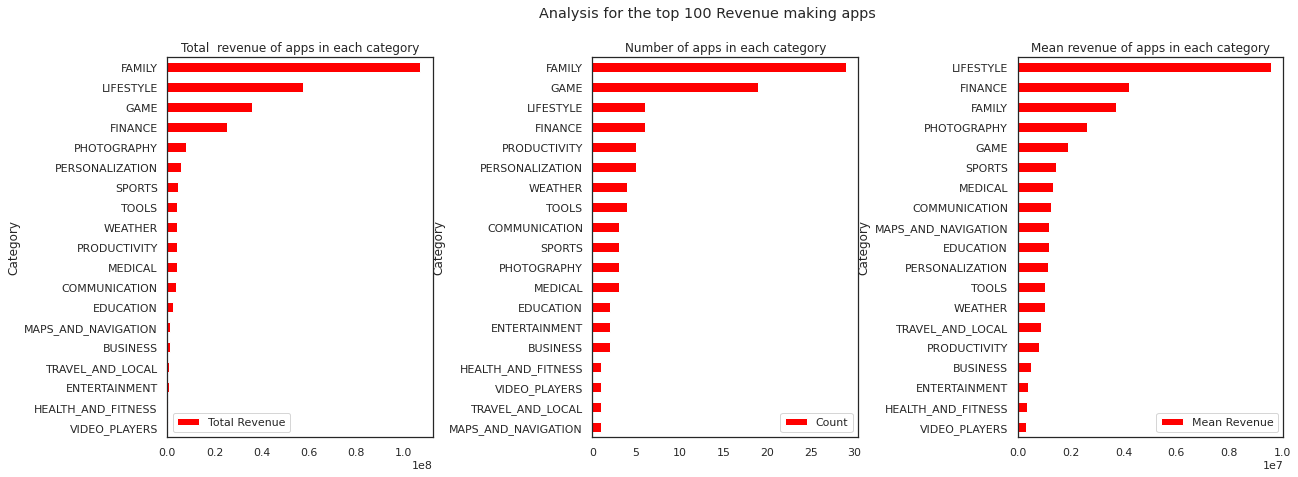

In [96]:
fig, axs = plt.subplots(1, 3, figsize=(20,7 ))
fig.suptitle('Analysis for the top 100 Revenue making apps')
fig.subplots_adjust(hspace=0, wspace = 0.6)

# Category in top 100 Revenue making apps.
df3 = df2[['Category','Revenue']].groupby(by= 'Category', as_index=True).sum().fillna(0).rename(columns={'Revenue': 'Total Revenue'}).sort_values(by=['Total Revenue'], ascending = True)
df3.plot(kind = 'barh', title = "Total  revenue of apps in each category", ax = axs[0], color = 'red')
# Category in top 100 Revenue making apps.
df3 = df2[['Category','Revenue']].groupby(by= 'Category', as_index=True).count().fillna(0).rename(columns={'Revenue': 'Count'}).sort_values(by=['Count'], ascending = True)
df3.plot(kind = 'barh',title = "Number of apps in each category", ax = axs[1], color = 'red')
# Category in top 100 Revenue making apps.
df3 = df2[['Category','Revenue']].groupby(by= 'Category', as_index=True).mean().fillna(0).rename(columns={'Revenue': 'Mean Revenue'}).sort_values(by=['Mean Revenue'], ascending = True)
df3.plot(kind = 'barh',title = "Mean revenue of apps in each category", ax = axs[2], color = 'red')

plt.show()

- Top 5 total revenue making category are Family, Lifestyle, Game, Finance, Photography
- Top 5 category with maximum number of available apps are Family, Lifestyle, Game, Finance, Photography
- Top 5 per mean revenue making category are Lifestyle, Finance, Family, Photography, Game

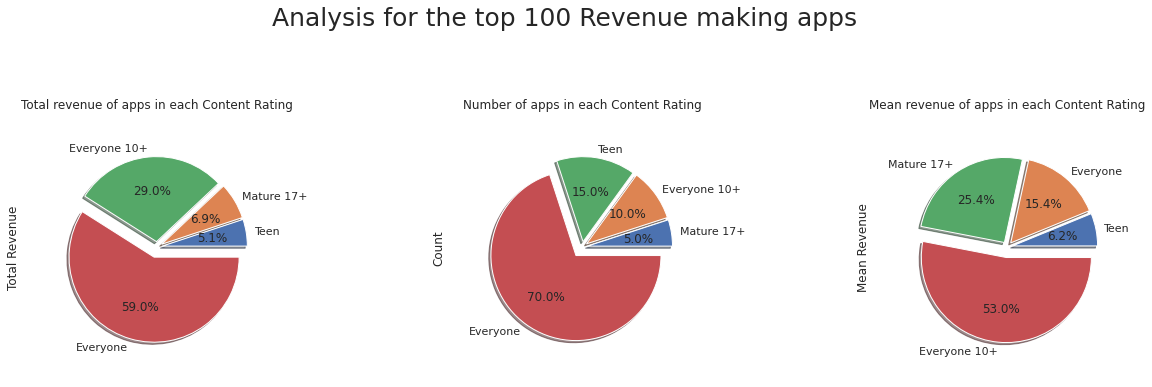

In [97]:
fig, axs = plt.subplots(1, 3, figsize=(20,7 ))
fig.suptitle('Analysis for the top 100 Revenue making apps', fontsize=25)
fig.subplots_adjust(hspace=0, wspace = 0.6)

# Content Rating in top 100 Revenue making apps.
df3 = df2[['Content Rating','Revenue']].groupby(by= 'Content Rating', as_index=True).sum().fillna(0).rename(columns={'Revenue': 'Total Revenue'}).sort_values(by=['Total Revenue'], ascending = True)
df3.plot(y = 'Total Revenue',kind = 'pie', title = "Total revenue of apps in each Content Rating", ax = axs[0],autopct='%1.1f%%', startangle=360,radius =0.8, shadow=True,legend=False,explode= (0.05, 0.05, 0.05, 0.1))
# Content Rating in top 100 Revenue making apps.
df3 = df2[['Content Rating','Revenue']].groupby(by= 'Content Rating', as_index=True).count().fillna(0).rename(columns={'Revenue': 'Count'}).sort_values(by=['Count'], ascending = True)
df3.plot(y = 'Count',kind = 'pie',  title = "Number of apps in each Content Rating", ax = axs[1],autopct='%1.1f%%', startangle=360,radius =0.8, shadow=True,legend=False,explode= (0.05, 0.05, 0.05, 0.1))

# Content Rating in top 100 Revenue making apps.
df3 = df2[['Content Rating','Revenue']].groupby(by= 'Content Rating', as_index=True).mean().fillna(0).rename(columns={'Revenue': 'Mean Revenue'}).sort_values(by=['Mean Revenue'], ascending = True)
df3.plot(y = 'Mean Revenue',kind = 'pie', title = "Mean revenue of apps in each Content Rating", ax = axs[2],autopct='%1.1f%%', startangle=360,radius =0.8, shadow=True,legend=False,explode= (0.05, 0.05, 0.05, 0.1))
plt.show()

- The maximum total revenue comes from the category Everyone, and Everyone 10+
- The maximum apps are in the category Everyone, and Teen.
- The maximum revenue per app comes from Everyone 10+, and Mature 17+.

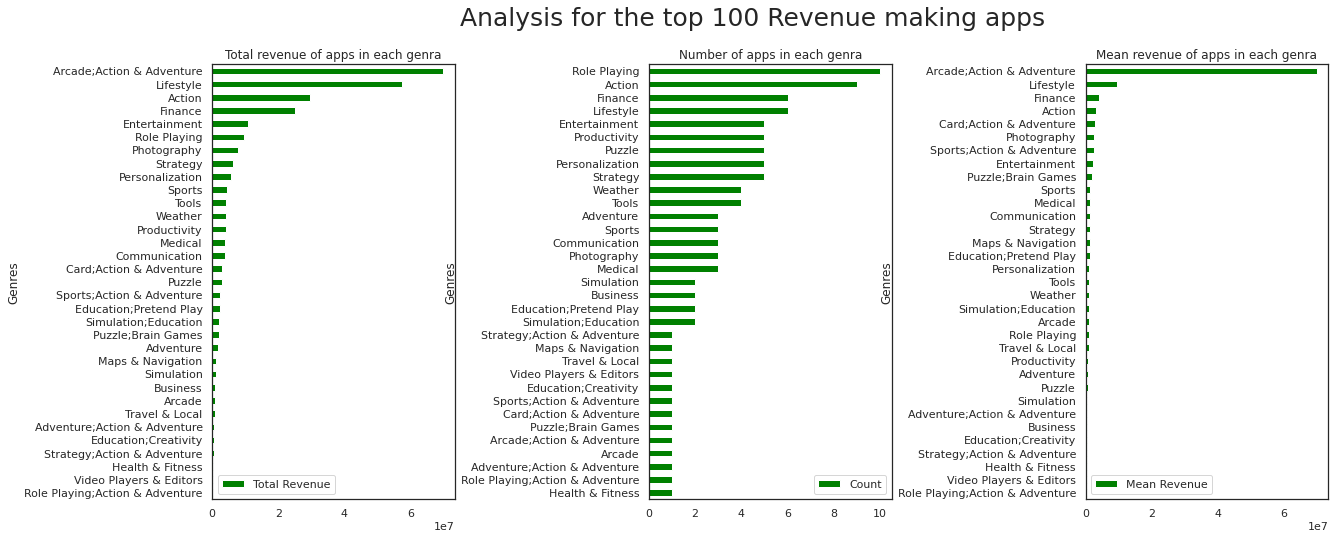

In [98]:
fig, axs = plt.subplots(1, 3, figsize=(20,8 ))
fig.suptitle('Analysis for the top 100 Revenue making apps', fontsize=25)
fig.subplots_adjust(hspace=0, wspace = 0.8)

# Genres in top 100 Revenue making apps.
df3 = df2[['Genres','Revenue']].groupby(by= 'Genres', as_index=True).sum().fillna(0).rename(columns={'Revenue': 'Total Revenue'}).sort_values(by=['Total Revenue'], ascending = True)
df3.plot(kind = 'barh', title = "Total revenue of apps in each genra", ax = axs[0], color = 'green')

# Genres in top 100 Revenue making apps.
df3 = df2[['Genres','Revenue']].groupby(by= 'Genres', as_index=True).count().fillna(0).rename(columns={'Revenue': 'Count'}).sort_values(by=['Count'], ascending = True)
df3.plot(kind = 'barh',  title = "Number of apps in each genra", ax = axs[1], color = 'green')

# Genres in top 100 Revenue making apps.
df3 = df2[['Genres','Revenue']].groupby(by= 'Genres', as_index=True).mean().fillna(0).rename(columns={'Revenue': 'Mean Revenue'}).sort_values(by=['Mean Revenue'], ascending = True)
df3.plot(kind = 'barh',  title = "Mean revenue of apps in each genra", ax = axs[2], color = 'green')
plt.show()

- Top 5 total revenue making genres are Arcade; Action & adventure, Lifestyle, Action, Finance, Entertainment 
- Top 5 genres with maximum number of available apps are Role Playing, Action, Finance, Lifestyle, Entertainment 
- Top 5 per mean revenue making genres are Arcade; Action & adventure, Lifestyle, Finance, Action, card; Action & adventure

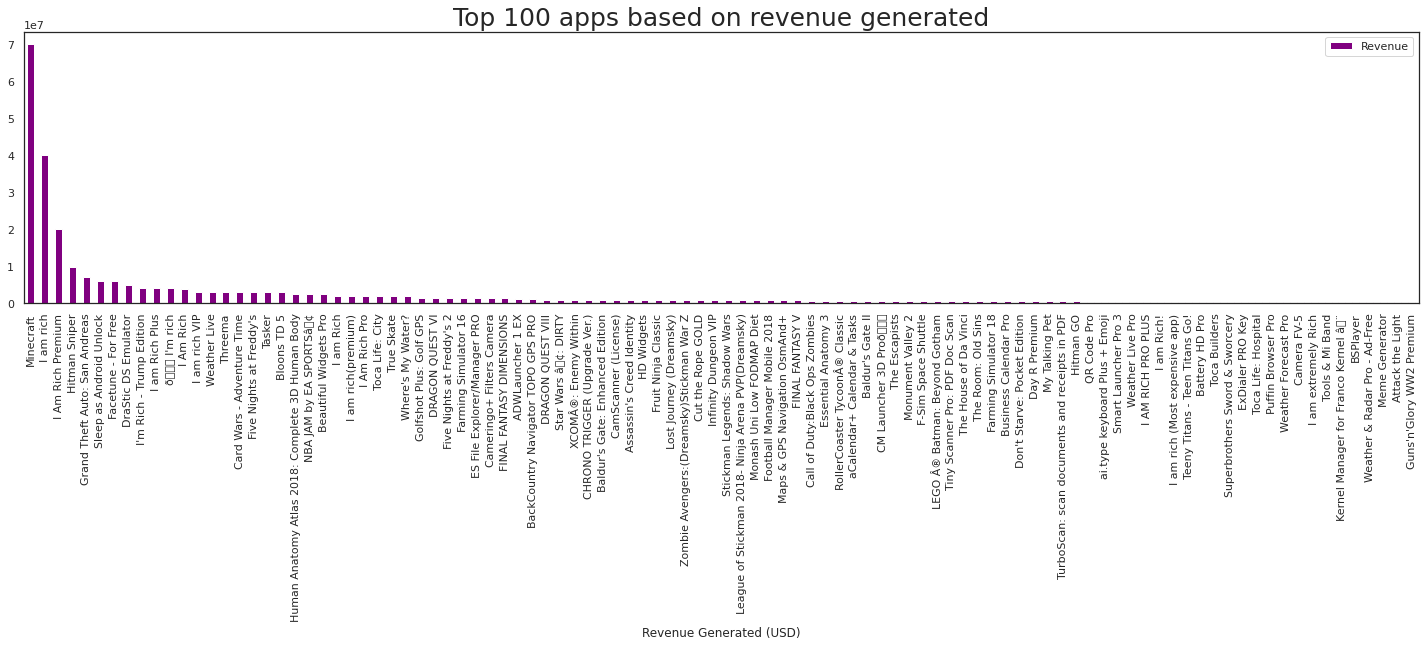

In [99]:
# Top paid apps according to the revenue generated through installs alone
df2 = df[['App', 'Price', 'Installs', "Content Rating", 'Genres', 'Category' ,'Revenue']].sort_values(by=['Revenue'], ascending = False).set_index('App').head(100)
df2.nlargest(100, 'Revenue')['Revenue'].plot.bar(figsize=(25,5), color = 'purple')
plt.xlabel('Revenue Generated (USD)')
plt.title('Top 100 apps based on revenue generated', fontsize=25)
plt.legend()
plt.show()


Top 5 Revenue making apps are: 
1. Minecraft
2. I am rich
3. I Am Rich Premium
4. Hitman Sniper
5. Grand Theft Auto: San Andreas

## <font size="+2" color='#144c5c'><b> Exploring and Cleaning the User Reviews Data 

### <font  size="+1" color='#144c5c'> Lets take a glimpse of the overall data and each column indiviudally 

In [100]:
# Load the data 
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1DFffN4TMHEK4G4XQ8PDvakjjJau0nwsg')
# View the data
df.head(5)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [101]:
# Lets first get basic info of the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [102]:
# Describe the data 
df.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


In [103]:
# Find the total null values 
df.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [104]:
# All the unique App with their frequency 
df['App'].value_counts()

Angry Birds Classic                                  320
CBS Sports App - Scores, News, Stats & Watch Live    320
Bowmasters                                           320
8 Ball Pool                                          300
Helix Jump                                           300
                                                    ... 
Easy Healthy Recipes                                  31
Dresses Ideas & Fashions +3000                        31
Detector de Radares Gratis                            31
Easy Hair Style Design                                30
Drawing Clothes Fashion Ideas                         30
Name: App, Length: 1074, dtype: int64

In [105]:
# All the unique values of Sentiment with their frequency 
df['Sentiment'].value_counts()

Positive    23998
Negative     8271
Neutral      5163
Name: Sentiment, dtype: int64

In [106]:
# All the unique values of Sentiment_Polarity with their frequency 
df['Sentiment_Polarity'].value_counts()

 0.000000    5163
 0.500000    1524
 0.700000     991
 1.000000     959
 0.800000     639
             ... 
-0.072024       1
 0.452000       1
 0.076190       1
-0.067256       1
 0.173333       1
Name: Sentiment_Polarity, Length: 5410, dtype: int64

In [107]:
# All the unique values of Sentiment_Subjectivity with their frequency 
df['Sentiment_Subjectivity'].value_counts()

0.000000    4416
1.000000    1749
0.500000    1647
0.600000    1166
0.750000    1140
            ... 
0.616909       1
0.234848       1
0.154762       1
0.591146       1
0.259470       1
Name: Sentiment_Subjectivity, Length: 4474, dtype: int64

### <font  size="+1" color='#144c5c'> Lets first deal with the null values and drop the redundant columns.

In [108]:
# All the rows in which atleast one feature is null (exculding Ratings)
None_df = df[df.isnull().sum(axis=1) >= 1]
None_df.head(5)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
2,10 Best Foods for You,NaN,NaN,NaN,NaN
7,10 Best Foods for You,NaN,NaN,NaN,NaN
15,10 Best Foods for You,NaN,NaN,NaN,NaN
102,10 Best Foods for You,NaN,NaN,NaN,NaN
107,10 Best Foods for You,NaN,NaN,NaN,NaN


In [109]:
df = df.dropna(how= "all", subset=['Translated_Review', 'Sentiment', 'Sentiment_Polarity', 'Sentiment_Subjectivity'])

In [110]:
df.isnull().sum()

App                       0
Translated_Review         5
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

## <font size="+2" color='#144c5c'><b> Finding the insights from the User reviews data

#### <font  size="+1" color='#144c5c'> Plot 1. Pie plot for the total sentiments 

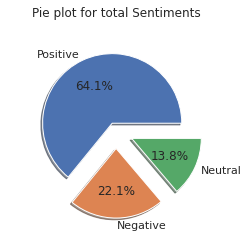

In [111]:
df['Sentiment'].value_counts().plot(y =('Installs', 'count'), kind='pie', ylabel="", title = "Pie plot for total Sentiments", autopct='%1.1f%%', startangle=360,radius =0.8, shadow=True,explode= (0.1, 0.2, 0.2))
plt.show()

As an average, for an app there are a total of 64.1% positive reviews, 13.8% of negative reviews, and 22.1% of negative reviews.

#### <font  size="+1" color='#144c5c'> Plot 2. Top 15 apps with highest positive reviews

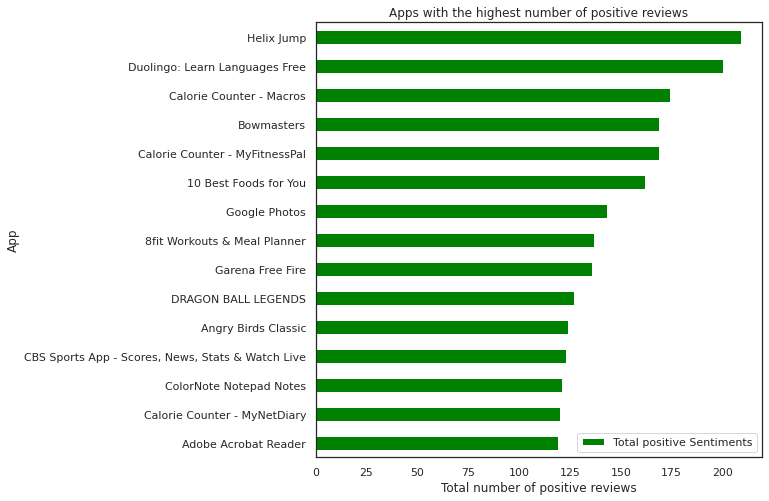

In [112]:
plt.rcParams['axes.grid'] = False
df1 = df[df['Sentiment'] == "Positive"]
df2 = df1.groupby('App').agg({"Translated_Review": "count", "Sentiment": "count", "Sentiment_Polarity": "mean", "Sentiment_Subjectivity" : "mean"})
df3 = df2['Sentiment'].sort_values(ascending=True).to_frame()
df3.tail(15).plot(y= 'Sentiment' , kind = 'barh',color= 'green', title = 'Apps with the highest number of positive reviews', figsize=(8,8) )
plt.xlabel('Total number of positive reviews')
plt.legend(['Total positive Sentiments'])

plt.show()

#### <font  size="+1" color='#144c5c'> Plot 3. Top 15 apps with highest negative reviews

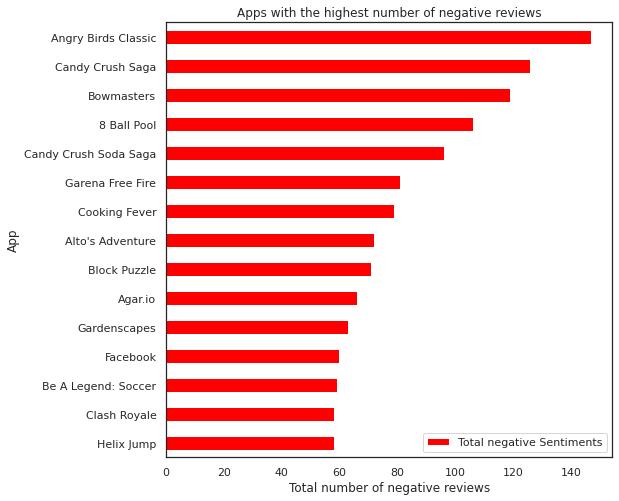

In [113]:
df1 = df[df['Sentiment'] == "Negative"]
df2 = df1.groupby('App').agg({"Translated_Review": "count", "Sentiment": "count", "Sentiment_Polarity": "mean", "Sentiment_Subjectivity" : "mean"})
df3 = df2['Sentiment'].sort_values(ascending=True).to_frame()
df3.tail(15).plot(y= 'Sentiment' , kind = 'barh',color= 'red', title = 'Apps with the highest number of negative reviews', figsize=(8,8) )
plt.xlabel('Total number of negative reviews')
plt.legend(['Total negative Sentiments'])
plt.show()

#### <font  size="+1" color='#144c5c'> Plot 4. Word Cloud for all the positive app reviews

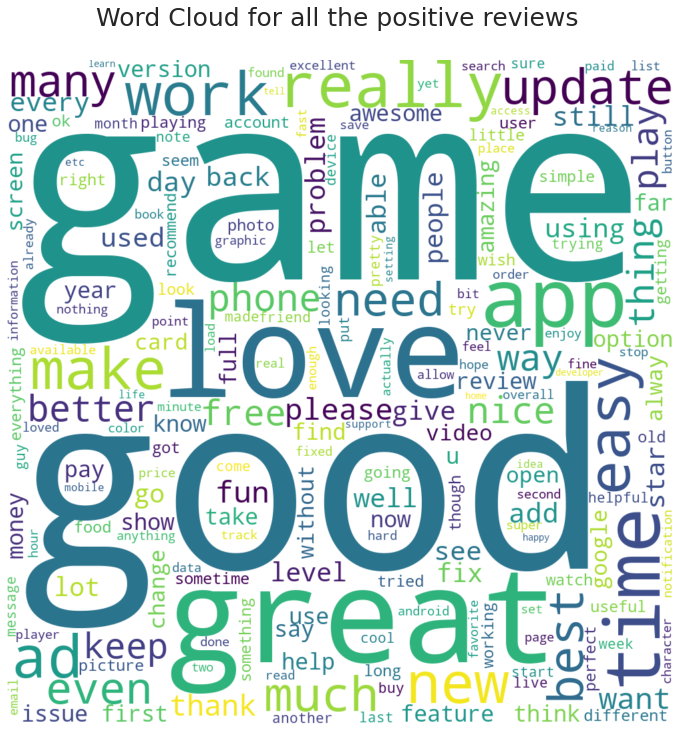

In [114]:
#Creating the text variable
review_series = df[df['Sentiment'] == "Positive"]["Translated_Review"].values
word_list = []
[word_list.extend(review.split())  for review in review_series]
result = " ".join(word_list)
word_content = result.lower()
word_content

# Creating word_cloud with text as argument in .generate() method
wordcloud = WordCloud(collocations = False,width=1000, height=1000, stopwords = STOPWORDS, background_color = 'white').generate(word_content)
                

# plot the WordCloud image                      
plt.figure(figsize = (10,10), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud for all the positive reviews \n', fontsize = 25)
plt.tight_layout(pad = 0)

#### <font  size="+1" color='#144c5c'> Plot 5. Word Cloud for all the negative app reviews

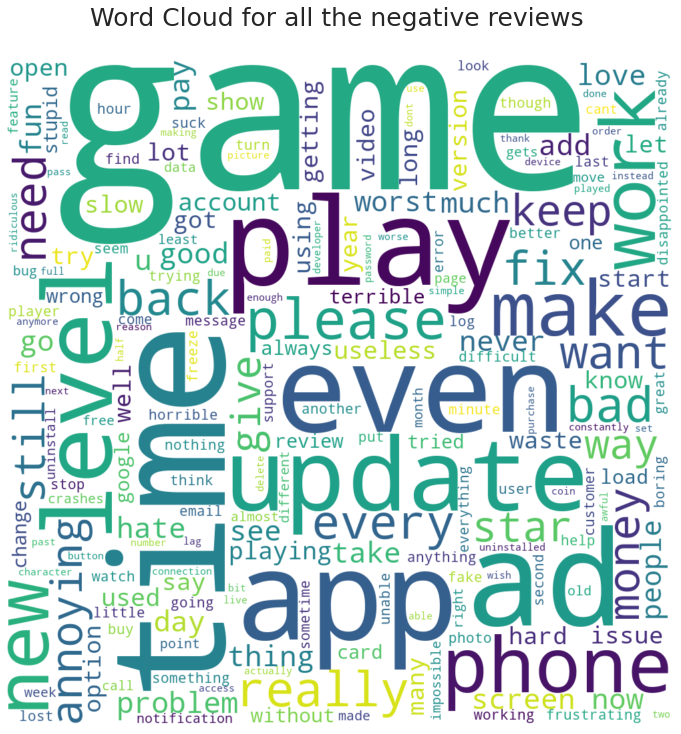

In [115]:
#Creating the text variable
review_series = df[df['Sentiment'] == "Negative"]["Translated_Review"].values
word_list = []
[word_list.extend(review.split())  for review in review_series]
result = " ".join(word_list)
word_content = result.lower()
word_content

# Creating word_cloud with text as argument in .generate() method
wordcloud = WordCloud(collocations = False,width=1000, height=1000, stopwords = STOPWORDS, background_color = 'white').generate(word_content)
                

# plot the WordCloud image                      
plt.figure(figsize = (10,10), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud for all the negative reviews \n', fontsize = 25)
plt.tight_layout(pad = 0)

## <font size="+2" color='#144c5c'><b> Final Conclusion

<font size="" color='#144c5c'><b> The app engagement and success can be expressed with the app’s total installs and the revenue it generating. 


- The demand of free apps is higher than the paid apps, so you can give priority to free apps.
- In free apps, the category of Communication, Social, Game, Productivity, and Tools will be the best choice to increase the app install.
- In paid apps, the category of Game, Family, Photography, Personalization, and Tools will be the best choice to increase the app install.
- In paid apps, the category of Lifestyle, Finance, Family, Game, Photography will be the best choice to increase the app Revenue.
- In free apps, the genre of Communication, Social, Productivity, Photography and Tools will be the best choice to increase the app install.
- In paid apps, the genre of Action, Action & Adventure, Arcade will be the best choice to increase the app Revenue.
- In Free apps, the content rating of Everyone, and Teen will increase the app installs and in paid apps, the content rating of Everyone 10+, Mature 17+ will increase the app installs.
- An quality app in the lowest rating apps genre or category like Dating, Maps & Navigation, Video players can give a fruitful result.
- Apps like Helix Jump, Duolingo, Calorie Counter, Bowmasters, 10 Best foods for you, google photos, Bfit Workouts & Meal Planner have highest number of positive reviews.
- The median size of paid apps is 9 MB, and the median price of paid app is $2. The median size of free app is 12 MB.
- In top 100 revenue making apps, apps from the category Lifestyle, Finance, and Family have highest average revenue per app.
- In top 100 revenue making apps, apps from the content rating Everyone, Everyone 10+  making highest total revenue but apps for Everyone 10+, Mature 17+ are very limited therefore the average revenue per app in content rating Everyone 10+, Mature 17+ is highest. These two category should be preferred.
In top 100 revenue making apps, apps from the genre Arcade;Action & Adventure, Lifestyle, Finance have highest average revenue per app. </font>